In [1]:
#importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc

In [2]:
#reading the csv dataset file

data=pd.read_csv("googleplaystore.csv")

In [3]:
data

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres Last Updated  \
0           Everyone               Art & Design    07-Jan-18   
1           Everyone  Art & Design;Pretend Play    15-Jan-18   
2           Everyone               Art & Design    01-Aug-18   
3               Teen               Art & Design    08-Jun-18   
4           Everyone    Art & Design;Creativity    20-Jun-18   
...              ...                        ...          ...   
10836       Everyone                  Education    25-Jul-17   
10837       Everyone                  Education    06-Jul-18   
10838       Everyone                    Medical    20-Jan-17   
10839     Mature 17+          Books & Reference    19-Jan-15   
10840       Everyone                  Lifestyle    25-Jul-18   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                   1          4.1 and up  
10838                   1          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

## Data Cleaning

In [4]:
#Finding out the no of null values in each column of the dataset

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#Finding out the percentage of null values in each column of the dataset

(data.isnull().sum()/data.shape[0])*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [6]:
#Finding the entries with rating value > 5.0

data[data['Rating']>5.0]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating     Genres Last Updated  \
10472  1,000+     Free    0  Everyone            NaN  11-Feb-18       1.0.19   

      Current Ver Android Ver  
10472  4.0 and up         NaN

In [7]:
#Since we got the entry with rating value>5.0 is 19 here we are removing that entry from the dataset

data = data[data.Rating != 19]

In [8]:
#The columns Last Updated, Current Ver, Android Ver are not required for us, so we will take all the columns we require to 
#data1

data1=data[['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Genres']]

In [9]:
#Here we are finding the shape of the dataset i.e. no of rows and columns in the dataset

data1.shape

(10840, 10)

In [10]:
#Here we will try to fill the null entries in Rating column by Data imputation
#We will first find the mean, median, mode of Rating column

t_data=data1[pd.notnull(data1['Rating'])]
mean=np.mean(t_data['Rating'])
median=np.median(t_data['Rating'])
mode=sc.mode(t_data['Rating'])

print(mean,median,mode)

4.191757420456978 4.3 ModeResult(mode=array([4.4]), count=array([1109]))


In [11]:
#Here we will be imputing the Rating column using median that we calculated in above code

data1['Rating'].fillna(median,inplace=True)

# Here we are dropping the other null entries in the dataset because all the other na entries are few in number
data1.dropna(inplace=True)

C:\Users\kanak\anaconda3on25feb\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\kanak\anaconda3on25feb\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
# We will now be calculating the null values present after data cleaning
# Here we can see that now no null values are present

data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [13]:
# Here we are finding the percentage of duplicate entries present in the dataset data1

(data1.duplicated().value_counts()/data1.shape[0])*100


False    95.525417
True      4.474583
dtype: float64

In [14]:
data1[data1['App']=='Facebook']

App Category  Rating   Reviews                Size        Installs  \
2544  Facebook   SOCIAL     4.1  78158306  Varies with device  1,000,000,000+   
3943  Facebook   SOCIAL     4.1  78128208  Varies with device  1,000,000,000+   

      Type Price Content Rating  Genres  
2544  Free     0           Teen  Social  
3943  Free     0           Teen  Social

In [15]:
# Here we are removing the duplicate entries in the dataset

data1=data1.drop_duplicates(subset='App', keep='first')

In [16]:
data1[data1['App']=='Facebook']

App Category  Rating   Reviews                Size        Installs  \
2544  Facebook   SOCIAL     4.1  78158306  Varies with device  1,000,000,000+   

      Type Price Content Rating  Genres  
2544  Free     0           Teen  Social

In [17]:
# As we can see that the data in Installs column isn't present as required, so we do some modifications so that we could get
#desired data
# Modifications done are:
# Replacing , in Installs data with nothing
# Replacing + in Installs data with nothing
# Then we are converting the data to integer format

data1['Installs']=data1['Installs'].str.replace(',','').str.replace('+','').astype('int')


C:\Users\kanak\AppData\Local\Temp\ipykernel_12912\2505698862.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['Installs']=data1['Installs'].str.replace(',','').str.replace('+','').astype('int')


In [18]:
# As we can see that the data in Reviews column isn't present as required, so we do some modifications so that we could get
# desired data
# Modifications done are:
# We are converting the data to integer format

data1['Reviews']=data1['Reviews'].astype('int')

In [19]:
# As we can see that the data in Size column isn't present as required, so we are coverting the size from MB and KB to bytes
# Modifications done are:
# Replacing M in Size data with e+6 
# Replacing k in Size data with e+3
# Replacing varies with device in Size data with 0
# Then we are converting the data to float format

data1['Size']=data1['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')

In [20]:
# As we can see that the data in Price column isn't present as required, so we do some modifications so that we could get
#desired data
# Modifications done are:
# Replacing $ in Price data with nothing
# Then we are converting the data to float format

data1['Price']=data1['Price'].str.replace('$','').astype('float')

C:\Users\kanak\AppData\Local\Temp\ipykernel_12912\770130914.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['Price']=data1['Price'].str.replace('$','').astype('float')


In [21]:
# By using head we will be having a look at first 10 entries after data cleaning

data1.head(10)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

   Reviews        Size  Installs  Type  Price Content Rating  \
0      159  19000000.0     10000  Free    0.0       Everyone   
1      967  14000000.0    500000  Free    0.0       Everyone   
2    87510   8700000.0   5000000  Free    0.0       Everyone   
3   215644  25000000.0  50000000  Free    0.0           Teen   
4      967   2800000.0    100000  Free    0.0       Everyone   
5      167   5600000.0     50000  Free    0.0       Everyone   
6      178  19000000.0     50000  Free    0.0       Everyone   
7    36815  29000000.0   1000000  Free    0.0       Everyone   
8    13791  33000000.0   1000000  Free    0.0       Everyone   
9      121   3100000.0     10000  Free    0.0       Everyone   

                      Genres  
0               Art & Design  
1  Art & Design;Pretend Play  
2               Art & Design  
3               Art & Design  
4    Art & Design;Creativity  
5               Art & Design  
6               Art & Design  
7               Art & Design  
8               Art & Design  
9    Art & Design;Creativity

## Data Visualization

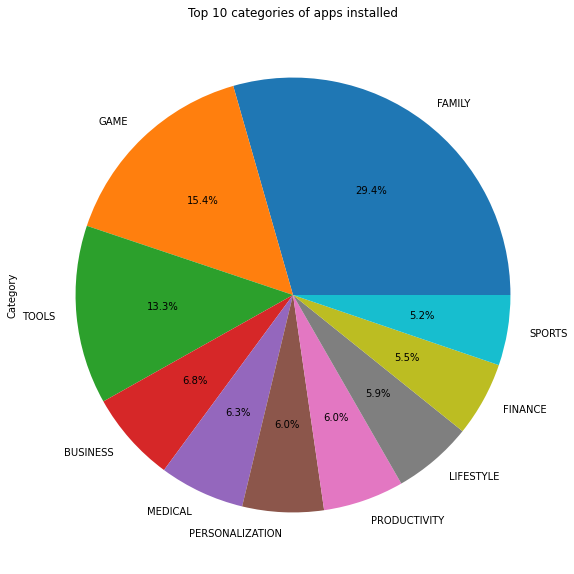

In [22]:
# Here we are plotting bar graph and pie chart for Category column to find out no of apps in each category

# Pie Chart
 
plt.figure(figsize=(40,10))
data1['Category'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')
plt.title("Top 10 categories of apps installed")
plt.show()


<center><h3>Family category has more no of installs than other apps</h3></center>

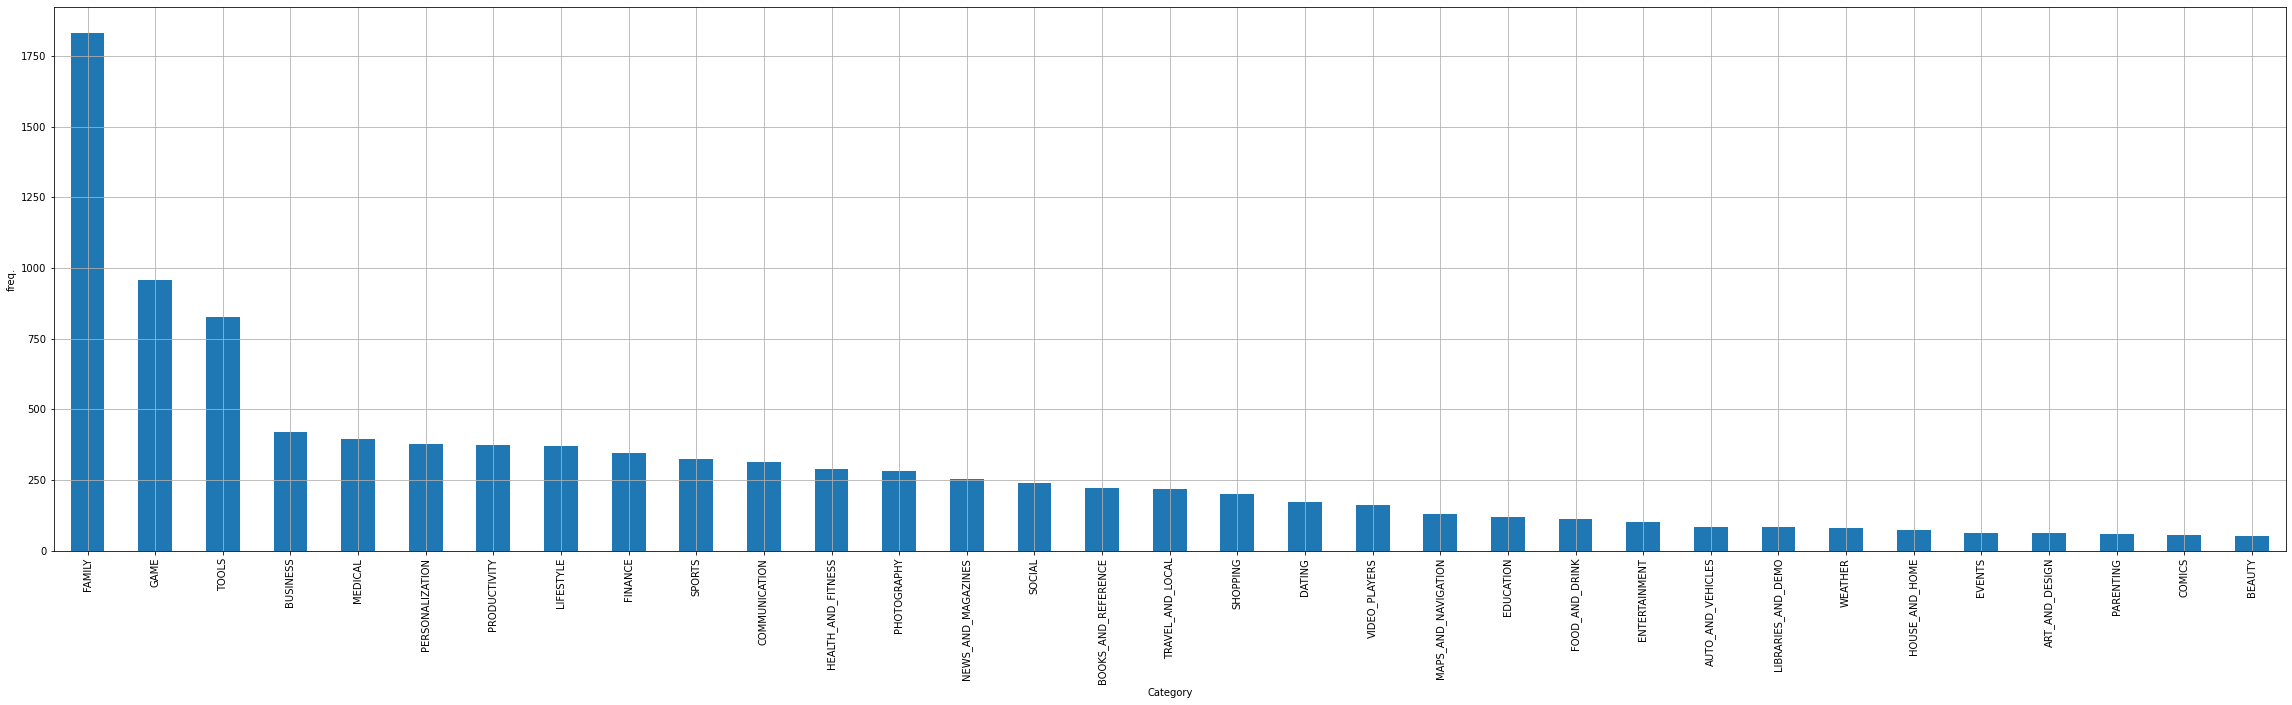

In [23]:
# Bar Graph

plt.figure(figsize=(40,10))
data1['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('freq.')
plt.grid()
plt.show()

<center><h3>Family category has more no of installs than other apps</h3></center>

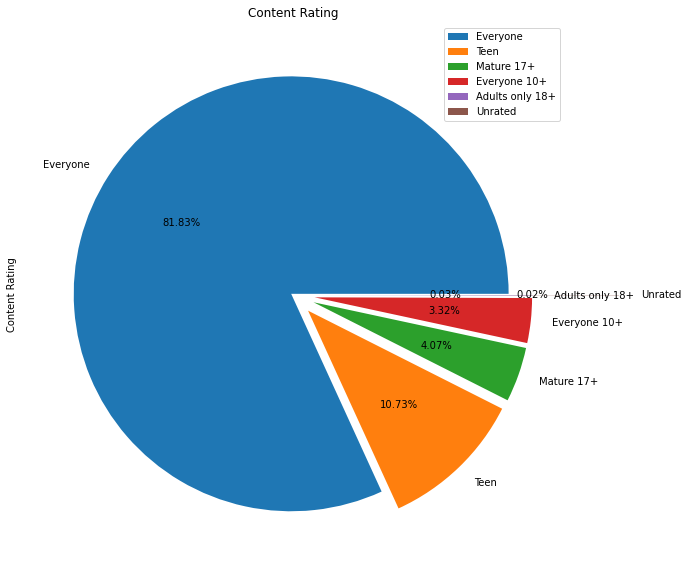

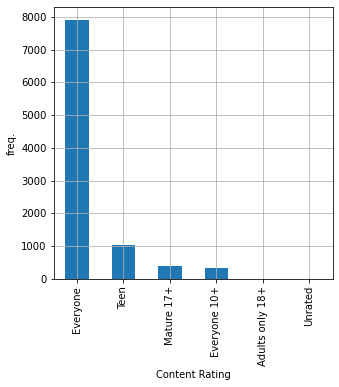

In [24]:
# Here we are plotting bar graph and pie chart for Content Rating column to find out no of apps in each Content Rating category

# Pie Chart

plt.figure(figsize=(40,10))
explode=[0.01,0.1,0.1,0.1,0.1,0.5]
data1['Content Rating'].value_counts().plot(kind='pie',autopct="%.2f%%",explode=explode)
plt.legend()
plt.title("Content Rating")
plt.show()

# Bar Graph

plt.figure(figsize=(5,5))
data1['Content Rating'].value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('freq.')
plt.grid()
plt.show()

<center><h3>most no of installs in content rating are everyone </h3></center>

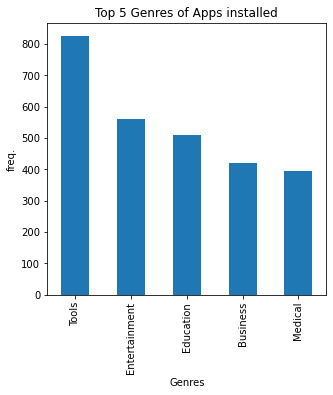

In [25]:
# Bar chart for top 5 genres of apps installed

plt.figure(figsize=(5,5))
data1['Genres'].value_counts().head(5).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('freq.')
plt.title("Top 5 Genres of Apps installed")
plt.show()

<center><h3>Tools genres apps are most installed app </h3></center>

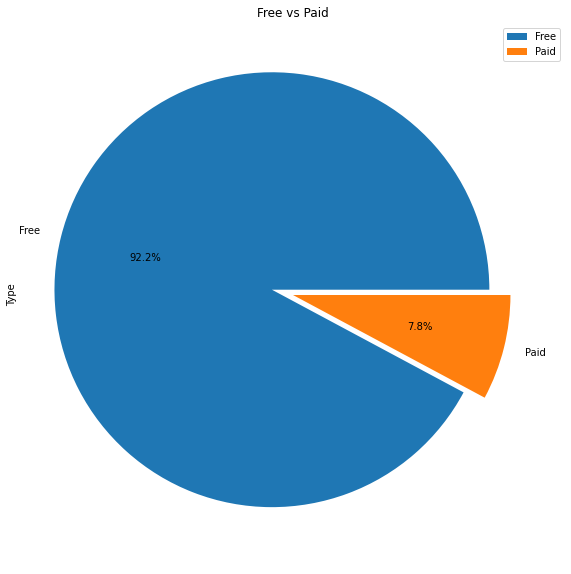

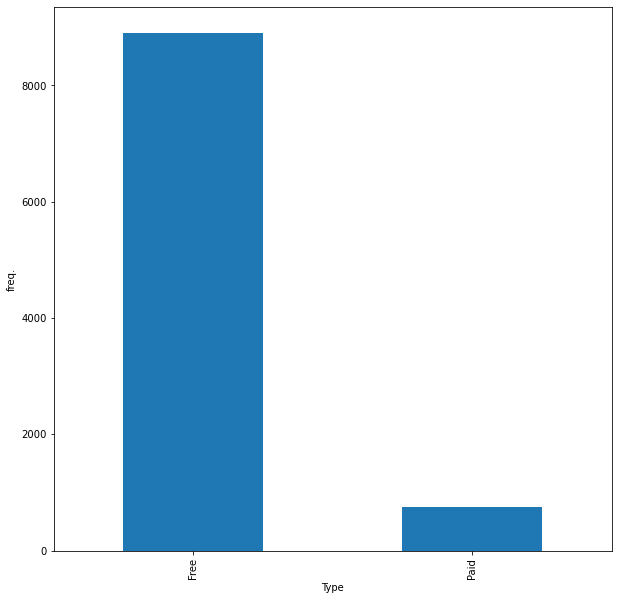

In [26]:
# Pie chart for no of apps in each Type of app i.e Free or Paid

plt.figure(figsize=(10,10))
explode=[0.1,0]
data1['Type'].value_counts().plot(kind='pie',autopct="%.1f%%",explode=explode)
plt.legend()
plt.title("Free vs Paid")
plt.show()
plt.figure(figsize=(10,10))

# Bar chart for no of apps in each Type of app i.e Free or Paid

data1['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('freq.')
plt.show()


<center><h3>most of the app are free in playstore </h3></center>

In [27]:
#Apps with most no of installs

data1[data1['Installs']==data1['Installs'].max()]

App             Category  Rating  \
152                          Google Play Books  BOOKS_AND_REFERENCE     3.9   
335   Messenger – Text and Video Chat for Free        COMMUNICATION     4.0   
336                         WhatsApp Messenger        COMMUNICATION     4.4   
338               Google Chrome: Fast & Secure        COMMUNICATION     4.3   
340                                      Gmail        COMMUNICATION     4.3   
341                                   Hangouts        COMMUNICATION     4.0   
391              Skype - free IM & video calls        COMMUNICATION     4.1   
865                          Google Play Games        ENTERTAINMENT     4.3   
1654                            Subway Surfers                 GAME     4.5   
2544                                  Facebook               SOCIAL     4.1   
2545                                 Instagram               SOCIAL     4.5   
2554                                   Google+               SOCIAL     4.2   
2808                             Google Photos          PHOTOGRAPHY     4.5   
3117                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
3127                        Google Street View     TRAVEL_AND_LOCAL     4.2   
3234                                    Google                TOOLS     4.4   
3454                              Google Drive         PRODUCTIVITY     4.4   
3665                                   YouTube        VIDEO_PLAYERS     4.3   
3687                   Google Play Movies & TV        VIDEO_PLAYERS     3.7   
3736                               Google News   NEWS_AND_MAGAZINES     3.9   

       Reviews        Size    Installs  Type  Price Content Rating  \
152    1433233         0.0  1000000000  Free    0.0           Teen   
335   56642847         0.0  1000000000  Free    0.0       Everyone   
336   69119316         0.0  1000000000  Free    0.0       Everyone   
338    9642995         0.0  1000000000  Free    0.0       Everyone   
340    4604324         0.0  1000000000  Free    0.0       Everyone   
341    3419249         0.0  1000000000  Free    0.0       Everyone   
391   10484169         0.0  1000000000  Free    0.0       Everyone   
865    7165362         0.0  1000000000  Free    0.0           Teen   
1654  27722264  76000000.0  1000000000  Free    0.0   Everyone 10+   
2544  78158306         0.0  1000000000  Free    0.0           Teen   
2545  66577313         0.0  1000000000  Free    0.0           Teen   
2554   4831125         0.0  1000000000  Free    0.0           Teen   
2808  10858556         0.0  1000000000  Free    0.0       Everyone   
3117   9235155         0.0  1000000000  Free    0.0       Everyone   
3127   2129689         0.0  1000000000  Free    0.0       Everyone   
3234   8033493         0.0  1000000000  Free    0.0       Everyone   
3454   2731171         0.0  1000000000  Free    0.0       Everyone   
3665  25655305         0.0  1000000000  Free    0.0           Teen   
3687    906384         0.0  1000000000  Free    0.0           Teen   
3736    877635  13000000.0  1000000000  Free    0.0           Teen   

                       Genres  
152         Books & Reference  
335             Communication  
336             Communication  
338             Communication  
340             Communication  
341             Communication  
391             Communication  
865             Entertainment  
1654                   Arcade  
2544                   Social  
2545                   Social  
2554                   Social  
2808              Photography  
3117           Travel & Local  
3127           Travel & Local  
3234                    Tools  
3454             Productivity  
3665  Video Players & Editors  
3687  Video Players & Editors  
3736         News & Magazines

In [28]:
# Apps with largest number of reviews

data1[data1['Reviews']==data1['Reviews'].max()]

App Category  Rating   Reviews  Size    Installs  Type  Price  \
2544  Facebook   SOCIAL     4.1  78158306   0.0  1000000000  Free    0.0   

     Content Rating  Genres  
2544           Teen  Social

Text(0.5, 1.0, 'Apps with most reviews')

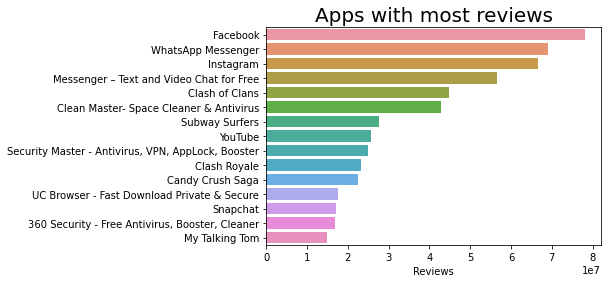

In [29]:
# Here we are visualizing top 10 apps with more no of reviews

import seaborn as sns
sorte = data1.sort_values(['Reviews'],ascending = 0 )[:15]
ax = sns.barplot(x = 'Reviews' , y = 'App', data = sorte  )
ax.set_xlabel('Reviews')
ax.set_ylabel('')
ax.set_title("Apps with most reviews", size = 20)

<center><h3>Facebook app got highest no of reviews in playstore</h3></center>

Text(0.5, 1.0, 'Most Popular Family Category Apps in Play Store')

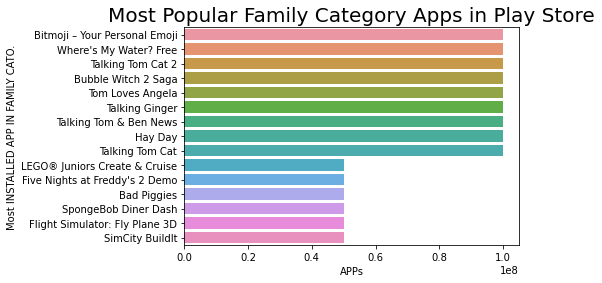

In [30]:
# Here we are taking apps in family category and sorting them based on no of installs

data_cat=data1[data1['Category']=='FAMILY'].sort_values(['Installs'],ascending=0)[:15]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN FAMILY CATO.')
ax.set_title("Most Popular Family Category Apps in Play Store", size = 20)

<center><h3>we can see top 6 app was most no of installs in family category</h3></center>

Text(0.5, 1.0, 'Most Popular Games in Play Store')

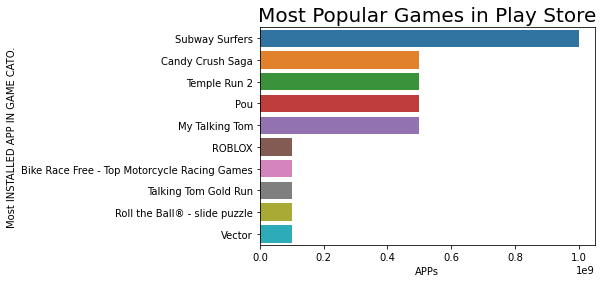

In [31]:
# Here we are taking apps in game category and sorting them based on no of installs

data_cat=data1[data1['Category']=='GAME'].sort_values(['Installs'],ascending=0)[:10]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN GAME CATO.')
ax.set_title("Most Popular Games in Play Store", size = 20)

<center><h3>we can see Subway Surfers app was most no of installs in game category</h3></center>

Text(0.5, 1.0, 'Most Popular Tool Category Apps in Play Store')

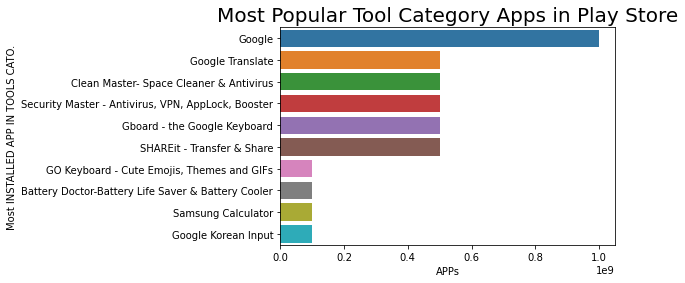

In [32]:
# Here we are taking apps in tools category and sorting them based on no of installs

data_cat=data1[data1['Category']=='TOOLS'].sort_values(['Installs'],ascending=0)[:10]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN TOOLS CATO.')
ax.set_title("Most Popular Tool Category Apps in Play Store", size = 20)

<center><h3>we can see google app was most no of installs in Tool category</h3></center>

Text(0.5, 1.0, 'Most Popular Business Category Apps in Play Store')

C:\Users\kanak\anaconda3on25feb\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kanak\anaconda3on25feb\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0, flags=flags)


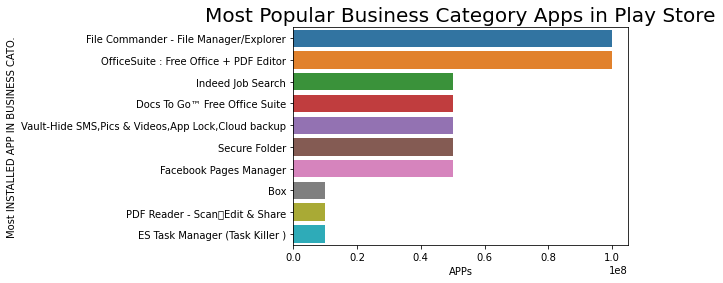

In [33]:
# Here we are taking apps in business category and sorting them based on no of installs

data_cat=data1[data1['Category']=='BUSINESS'].sort_values(['Installs'],ascending=0)[:10]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN BUSINESS CATO.')
ax.set_title("Most Popular Business Category Apps in Play Store", size = 20)

<center><h3>we can see File commander and OfficeSuite app was most no of installs in Business category</h3></center>

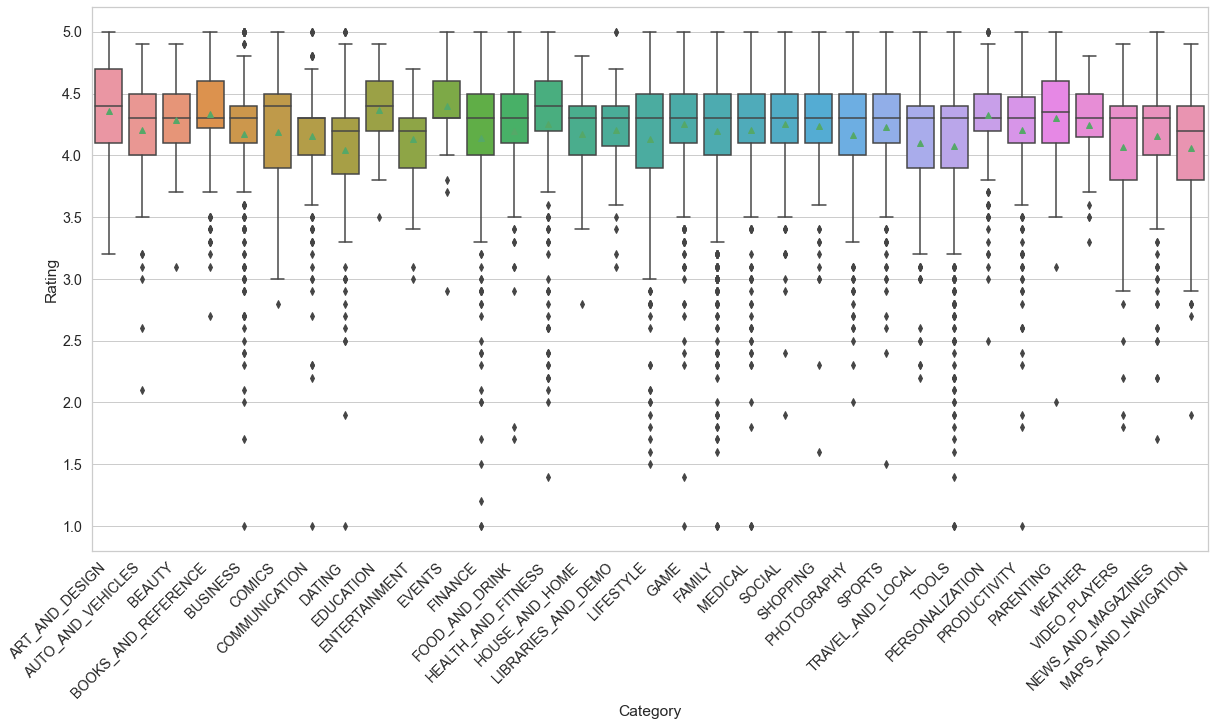

In [34]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.3, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=data1,showmeans=True)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

<center><h3>Rating of Most of the app category are above 4 </h3></center>

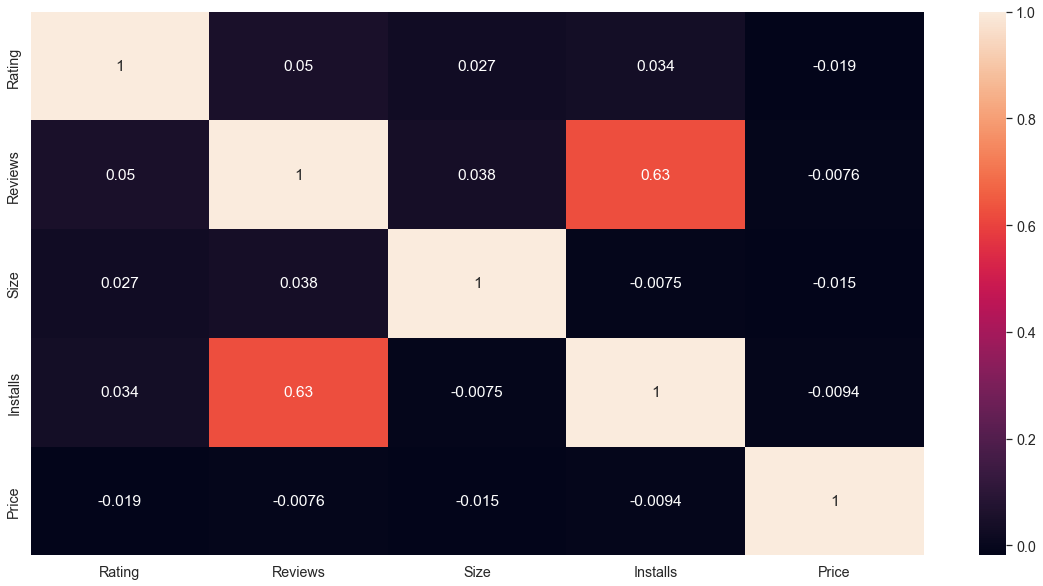

In [35]:
ax = sns.heatmap(data1.corr(), annot=True)

<center><h3> there exist a highest correlation  value in between installs and reviews </h3></center>

## Predicting Rating of Apps using Machine Learning techniques 

In [36]:
# Converting Category column categorical data into dummy or indicator variables.

dummy_C = pd.get_dummies(data1['Category'])
del dummy_C[dummy_C.columns[-1]]#To avoid dummy variable trap
data1 = pd.concat([data1, dummy_C], axis = 1)

In [37]:
data1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews        Size  Installs  Type  Price Content Rating  \
0      159  19000000.0     10000  Free    0.0       Everyone   
1      967  14000000.0    500000  Free    0.0       Everyone   
2    87510   8700000.0   5000000  Free    0.0       Everyone   
3   215644  25000000.0  50000000  Free    0.0           Teen   
4      967   2800000.0    100000  Free    0.0       Everyone   

                      Genres  ...  PARENTING  PERSONALIZATION  PHOTOGRAPHY  \
0               Art & Design  ...          0                0            0   
1  Art & Design;Pretend Play  ...          0                0            0   
2               Art & Design  ...          0                0            0   
3               Art & Design  ...          0                0            0   
4    Art & Design;Creativity  ...          0                0            0   

   PRODUCTIVITY  SHOPPING  SOCIAL  SPORTS  TOOLS  TRAVEL_AND_LOCAL  \
0             0         0       0       0      0                 0   
1             0         0       0       0      0                 0   
2             0         0       0       0      0                 0   
3             0         0       0       0      0                 0   
4             0         0       0       0      0                 0   

   VIDEO_PLAYERS  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 42 columns]

In [38]:
# Converting Type column categorical data into dummy or indicator variables.

dummy_T = pd.get_dummies(data1['Type'])
del dummy_T[dummy_T.columns[-1]]#To avoid dummy variable trap
data1 = pd.concat([data1, dummy_T], axis = 1)

In [39]:
# Converting Genres column categorical data into dummy or indicator variables.

dummy_G = pd.get_dummies(data1["Genres"])
del dummy_G[dummy_G.columns[-1]]#To avoid dummy variable trap
data1 = pd.concat([data1, dummy_G], axis = 1)

In [40]:
# Converting Content Rating column categorical data into dummy or indicator variables.

dummy = pd.get_dummies(data1['Content Rating'])
del dummy[dummy.columns[-1]]
data1 = pd.concat([data1, dummy], axis = 1)

In [41]:
data1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews        Size  Installs  Type  Price Content Rating  \
0      159  19000000.0     10000  Free    0.0       Everyone   
1      967  14000000.0    500000  Free    0.0       Everyone   
2    87510   8700000.0   5000000  Free    0.0       Everyone   
3   215644  25000000.0  50000000  Free    0.0           Teen   
4      967   2800000.0    100000  Free    0.0       Everyone   

                      Genres  ...  Trivia;Education  Video Players & Editors  \
0               Art & Design  ...                 0                        0   
1  Art & Design;Pretend Play  ...                 0                        0   
2               Art & Design  ...                 0                        0   
3               Art & Design  ...                 0                        0   
4    Art & Design;Creativity  ...                 0                        0   

   Video Players & Editors;Creativity  Video Players & Editors;Music & Video  \
0                                   0                                      0   
1                                   0                                      0   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   

   Weather  Adults only 18+  Everyone  Everyone 10+  Mature 17+  Teen  
0        0                0         1             0           0     0  
1        0                0         1             0           0     0  
2        0                0         1             0           0     0  
3        0                0         0             0           0     1  
4        0                0         1             0           0     0  

[5 rows x 165 columns]

In [42]:
data1.shape

(9658, 165)

In [43]:
# Eliminating categorical data from the dataset

datamodel = data1.drop(["Category", "Type", "Content Rating", "Genres", "App"], axis =1)

In [44]:
datamodel

Rating  Reviews        Size  Installs  Price  ART_AND_DESIGN  \
0         4.1      159  19000000.0     10000    0.0               1   
1         3.9      967  14000000.0    500000    0.0               1   
2         4.7    87510   8700000.0   5000000    0.0               1   
3         4.5   215644  25000000.0  50000000    0.0               1   
4         4.3      967   2800000.0    100000    0.0               1   
...       ...      ...         ...       ...    ...             ...   
10836     4.5       38  53000000.0      5000    0.0               0   
10837     5.0        4   3600000.0       100    0.0               0   
10838     4.3        3   9500000.0      1000    0.0               0   
10839     4.5      114         0.0      1000    0.0               0   
10840     4.5   398307  19000000.0  10000000    0.0               0   

       AUTO_AND_VEHICLES  BEAUTY  BOOKS_AND_REFERENCE  BUSINESS  ...  \
0                      0       0                    0         0  ...   
1                      0       0                    0         0  ...   
2                      0       0                    0         0  ...   
3                      0       0                    0         0  ...   
4                      0       0                    0         0  ...   
...                  ...     ...                  ...       ...  ...   
10836                  0       0                    0         0  ...   
10837                  0       0                    0         0  ...   
10838                  0       0                    0         0  ...   
10839                  0       0                    1         0  ...   
10840                  0       0                    0         0  ...   

       Trivia;Education  Video Players & Editors  \
0                     0                        0   
1                     0                        0   
2                     0                        0   
3                     0                        0   
4                     0                        0   
...                 ...                      ...   
10836                 0                        0   
10837                 0                        0   
10838                 0                        0   
10839                 0                        0   
10840                 0                        0   

       Video Players & Editors;Creativity  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
10836                                   0   
10837                                   0   
10838                                   0   
10839                                   0   
10840                                   0   

       Video Players & Editors;Music & Video  Weather  Adults only 18+  \
0                                          0        0                0   
1                                          0        0                0   
2                                          0        0                0   
3                                          0        0                0   
4                                          0        0                0   
...                                      ...      ...              ...   
10836                                      0        0                0   
10837                                      0        0                0   
10838                                      0        0                0   
10839                                      0        0                0   
10840                                      0        0                0   

       Everyone  Everyone 10+  Mature 17+  Teen  
0             1             0           0     0  
1             1             0           0     0  
2             1             0           0     0  
3             0             0     

In [45]:
datamodel.shape

(9658, 160)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Splitting data for training and testing models

X = datamodel.loc[:, datamodel.columns != "Rating"]

In [48]:
y = datamodel['Rating']

In [49]:
# 70% of data is used for training and 30% of data is used for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

### Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()

In [52]:
# Creating a linear regression model and fitting the training data in it

model_lr= lr.fit(X_train, y_train)

In [53]:
# Predicting the outcome by testing the model on testing data

y_pred_lr = model_lr.predict(X_test)

In [54]:
y_pred_lr

array([4.07172325, 4.16341363, 4.1490171 , ..., 4.30848084, 4.13035706,
       4.2669056 ])

In [55]:
# Comparing predicted and actual data

predict_dataframe_lr = pd.DataFrame(data={"Predicted": y_pred_lr, "Actual": y_test})

In [56]:
predict_dataframe_lr

Predicted  Actual
8045   4.071723     3.1
9038   4.163414     4.3
1489   4.149017     4.3
6750   4.075020     4.3
3378   4.290334     4.3
...         ...     ...
1435   4.265110     4.8
127    4.226225     4.6
2255   4.308481     4.4
925    4.130357     4.0
1284   4.266906     4.2

[2898 rows x 2 columns]

<AxesSubplot:>

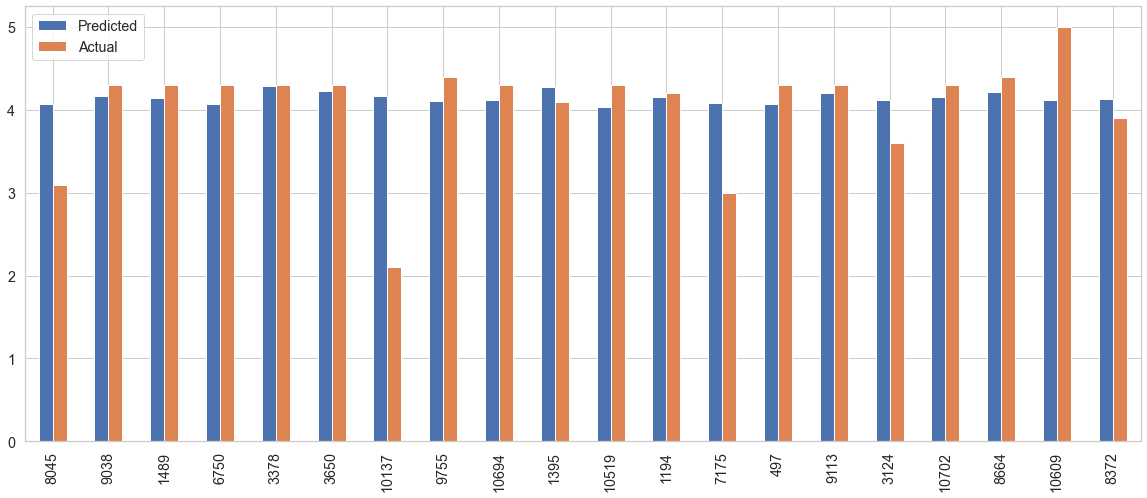

In [57]:
# Comparing predicted and actual data using bar chart

predict_dataframe_lr[:20].plot(kind = "bar", figsize = (20,8))

In [58]:


from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_lr)*100

24.90926324872763

### Random Forest Regression 

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rfr = RandomForestRegressor()

In [61]:
# Creating a Random Forest Regression model and fitting the training data in it

modef_rfr = rfr.fit(X_train, y_train)

In [62]:
# Predicting the outcome by testing the model on testing data

y_pred_rfr = modef_rfr.predict(X_test)

In [63]:
# Comparing predicted and actual data

rfr_df = pd.DataFrame(data={"Predicted": y_pred_rfr, "Actual": y_test})

In [64]:
rfr_df

Predicted  Actual
8045      4.014     3.1
9038      4.080     4.3
1489      4.205     4.3
6750      4.314     4.3
3378      4.495     4.3
...         ...     ...
1435      4.332     4.8
127       4.260     4.6
2255      4.220     4.4
925       4.003     4.0
1284      4.044     4.2

[2898 rows x 2 columns]

<AxesSubplot:>

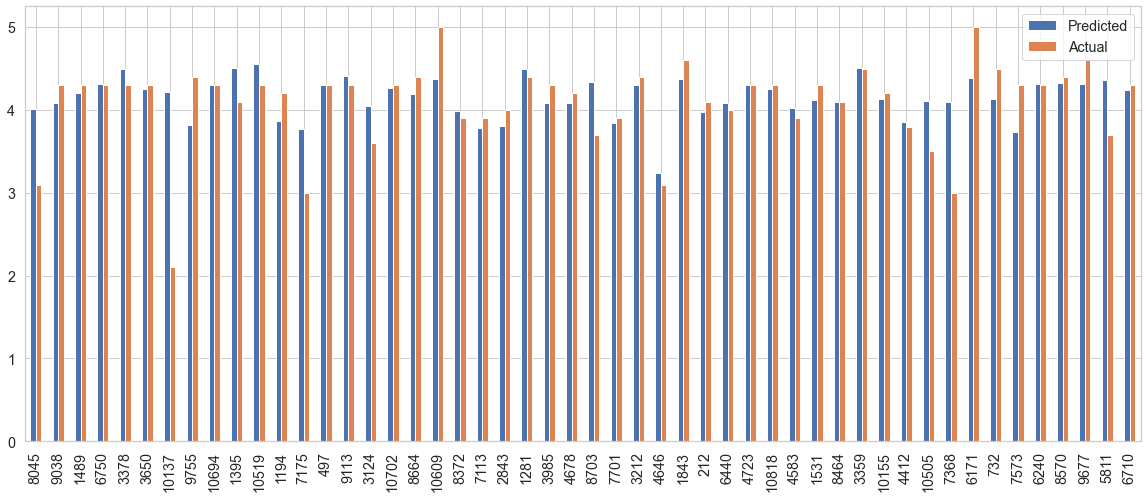

In [65]:
# Comparing predicted and actual data using bar chart

rfr_df[:50].plot(kind = "bar", figsize = (20,8))

In [66]:

mean_squared_error(y_test, y_pred_rfr)*100

22.943017399020395

In [68]:
!pip install xgboost

### XGBoost Regression 

In [69]:
import xgboost

In [70]:
from xgboost import XGBRegressor

In [71]:
model_xg=XGBRegressor()

In [72]:
# Creating a XGBoost Regression model and fitting the training data in it

model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [73]:
# Predicting the outcome by testing the model on testing data

y_pred_xg = model_xg.predict(X_test)

In [74]:
y_pred_xg

array([4.3634963, 4.0294776, 4.326164 , ..., 4.2233524, 4.1006293,
       4.047548 ], dtype=float32)

In [75]:
# Comparing predicted and actual data

xgb_df = pd.DataFrame(data={"Predicted": y_pred_xg, "Actual": y_test})

In [76]:
xgb_df

Predicted  Actual
8045   4.363496     3.1
9038   4.029478     4.3
1489   4.326164     4.3
6750   4.395020     4.3
3378   4.378509     4.3
...         ...     ...
1435   4.408286     4.8
127    3.903549     4.6
2255   4.223352     4.4
925    4.100629     4.0
1284   4.047548     4.2

[2898 rows x 2 columns]

<AxesSubplot:>

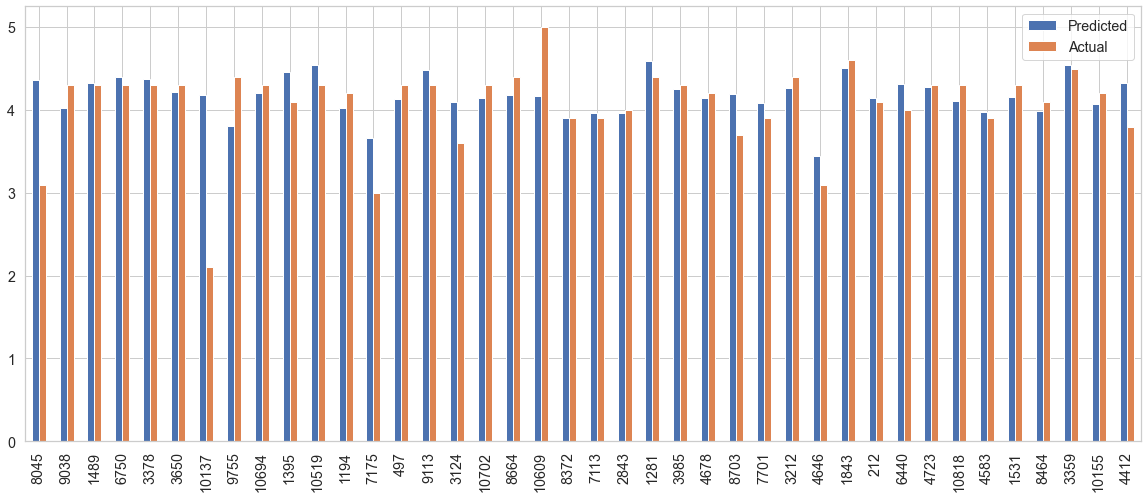

In [77]:
# Comparing predicted and actual data using bar chart

xgb_df[:40].plot(kind = "bar", figsize = (20,8))

In [78]:
mean_squared_error(y_test, y_pred_xg)

0.22579150787430077

In [79]:
X_testCopy = X_test.copy()
X_testCopy=X_testCopy.loc[:, ["Reviews","Size","Installs","Price"]]
X_testCopy["Popular"] = y_pred_xg

In [80]:
X_testCopy

Reviews        Size  Installs  Price   Popular
8045       19  94000000.0      1000   0.00  4.363496
9038     1894  40000000.0    100000   0.00  4.029478
1489       10   4200000.0     10000   0.00  4.326164
6750        0    191000.0        10   0.00  4.395020
3378   266401         0.0  10000000   0.00  4.378509
...       ...         ...       ...    ...       ...
1435    31665   8400000.0   1000000   0.00  4.408286
127       184  21000000.0     10000   0.00  3.903549
2255     1361  33000000.0     50000   2.99  4.223352
925     22998         0.0   1000000   0.00  4.100629
1284    14709  15000000.0   5000000   0.00  4.047548

[2898 rows x 5 columns]

In [81]:
X_testCopy["Popular"] = (X_testCopy["Popular"] > 4.1)*1

In [82]:
X_testCopy

Reviews        Size  Installs  Price  Popular
8045       19  94000000.0      1000   0.00        1
9038     1894  40000000.0    100000   0.00        0
1489       10   4200000.0     10000   0.00        1
6750        0    191000.0        10   0.00        1
3378   266401         0.0  10000000   0.00        1
...       ...         ...       ...    ...      ...
1435    31665   8400000.0   1000000   0.00        1
127       184  21000000.0     10000   0.00        0
2255     1361  33000000.0     50000   2.99        1
925     22998         0.0   1000000   0.00        1
1284    14709  15000000.0   5000000   0.00        0

[2898 rows x 5 columns]

In [83]:
X_testCopy[X_testCopy["Popular"]==0]

Reviews        Size  Installs  Price  Popular
9038     1894  40000000.0    100000    0.0        0
9755       12  19000000.0      1000    0.0        0
1194    10159  36000000.0   1000000    0.0        0
7175      262  37000000.0     10000    0.0        0
8372    53301   7600000.0  10000000    0.0        0
...       ...         ...       ...    ...      ...
7772    14754  21000000.0   1000000    0.0        0
6956        4   3000000.0      1000    0.0        0
4733      492  27000000.0     10000    0.0        0
127       184  21000000.0     10000    0.0        0
1284    14709  15000000.0   5000000    0.0        0

[922 rows x 5 columns]